# OBJECTIVE 
'''find the percentage of patients by gender with scholarship(free medical card) that Show up for their medical appointments. 
This will help us know if scholarships awards leads to increase or decrease in showing up for medical appointmements 
among the gender specification and to find out which gender the organisation will focus its scholarship awards on.
'''

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
# Import the no-show data

No_Show_Dataset = pd.read_csv('C:/Users/Nonso/Desktop/My Dataset/noshowappointments-kagglev2-may-2016.CSV')
No_Show_Dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,5.214650e+14,5552401,F,2016-04-06T15:51:25Z,2016-05-16T00:00:00Z,20,SANTA MARTHA,0,0,0,0,0,0,No
18065,3.833520e+13,5647927,M,2016-05-02T14:41:15Z,2016-05-02T00:00:00Z,47,JOANA D´ARC,0,0,0,0,0,0,No
18066,4.342690e+14,5675512,F,2016-05-09T13:50:20Z,2016-05-09T00:00:00Z,34,JOANA D´ARC,0,0,0,0,0,0,No
18067,2.759920e+13,5676352,M,2016-05-09T15:33:44Z,2016-05-09T00:00:00Z,2,SANTA MARTHA,0,0,0,0,0,0,No


In [74]:
# Check if there are missing values

No_Show_Dataset[No_Show_Dataset.isna()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# In case there are na, remove them

Removed_Na = No_Show_Dataset.dropna()
Removed_Na

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,5.214650e+14,5552401,F,2016-04-06T15:51:25Z,2016-05-16T00:00:00Z,20,SANTA MARTHA,0,0,0,0,0,0,No
18065,3.833520e+13,5647927,M,2016-05-02T14:41:15Z,2016-05-02T00:00:00Z,47,JOANA D´ARC,0,0,0,0,0,0,No
18066,4.342690e+14,5675512,F,2016-05-09T13:50:20Z,2016-05-09T00:00:00Z,34,JOANA D´ARC,0,0,0,0,0,0,No
18067,2.759920e+13,5676352,M,2016-05-09T15:33:44Z,2016-05-09T00:00:00Z,2,SANTA MARTHA,0,0,0,0,0,0,No


In [40]:
# Check if the dataset contains duplicate
Removed_Na[Removed_Na.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [78]:
# If there is duplicates, drop the duplicates
Cleaned_No_Show_Dataset = Removed_Na.drop_duplicates()
Cleaned_No_Show_Dataset 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,5.214650e+14,5552401,F,2016-04-06T15:51:25Z,2016-05-16T00:00:00Z,20,SANTA MARTHA,0,0,0,0,0,0,No
18065,3.833520e+13,5647927,M,2016-05-02T14:41:15Z,2016-05-02T00:00:00Z,47,JOANA D´ARC,0,0,0,0,0,0,No
18066,4.342690e+14,5675512,F,2016-05-09T13:50:20Z,2016-05-09T00:00:00Z,34,JOANA D´ARC,0,0,0,0,0,0,No
18067,2.759920e+13,5676352,M,2016-05-09T15:33:44Z,2016-05-09T00:00:00Z,2,SANTA MARTHA,0,0,0,0,0,0,No


In [52]:
# Check the info
Cleaned_No_Show_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18038 entries, 0 to 18068
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       18038 non-null  float64
 1   AppointmentID   18038 non-null  int64  
 2   Gender          18038 non-null  object 
 3   ScheduledDay    18038 non-null  object 
 4   AppointmentDay  18038 non-null  object 
 5   Age             18038 non-null  int64  
 6   Neighbourhood   18038 non-null  object 
 7   Scholarship     18038 non-null  int64  
 8   Hipertension    18038 non-null  int64  
 9   Diabetes        18038 non-null  int64  
 10  Alcoholism      18038 non-null  int64  
 11  Handcap         18038 non-null  int64  
 12  SMS_received    18038 non-null  int64  
 13  No-show         18038 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 2.1+ MB


In [63]:
# Describe the data 
Cleaned_No_Show_Dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.803800e+04,1.803800e+04,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000
mean,1.504846e+14,5.651573e+06,36.802861,0.088868,0.183003,0.062646,0.050782,0.021067,0.312008
std,2.604540e+14,6.537795e+04,22.096332,0.284561,0.386679,0.242331,0.219558,0.154041,0.463326
min,9.380000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.224592e+12,5.626248e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.114910e+13,5.660028e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.379530e+13,5.697478e+06,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999350e+14,5.754683e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [53]:
# show where Age is equal to 1 or less than 0
Cleaned_No_Show_Dataset[(Cleaned_No_Show_Dataset['Age'] == -1)  &  (Cleaned_No_Show_Dataset['Age'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [64]:
# we will be analysing based on gender

In [151]:
# 1: Explore the distribution of gender in the dataset.
Gender_Distribution = Cleaned_No_Show_Dataset['Gender'].value_counts()
Gender_Distribution

F    11154
M     6884
Name: Gender, dtype: int64

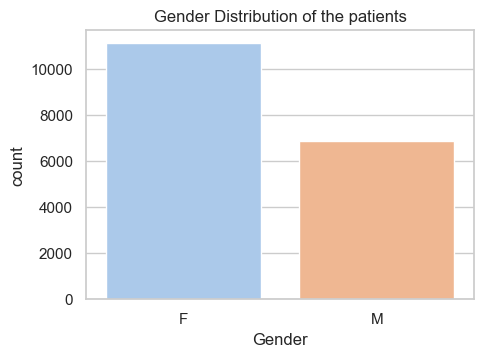

In [61]:
# Plot the gender distribution of the patients
sns.set(style = 'whitegrid')
plt.figure(figsize = (5,3.5))
sns.countplot(data = Cleaned_No_Show_Dataset, x = 'Gender', palette = 'pastel')
plt.title('Gender Distribution of the patients')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

In [89]:
# first find the total number of people with scholarship
All_Those_With_Scholarship = Cleaned_No_Show_Dataset[Cleaned_No_Show_Dataset['Scholarship']==1]
All_Those_With_Scholarship 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
12,5.666550e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,1.479500e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
18,1.713540e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
31,3.112850e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
33,7.653520e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,4.595450e+12,5643163,F,2016-05-02T07:10:54Z,2016-05-02T00:00:00Z,79,SANTA MARTHA,1,1,1,0,0,0,No
18038,3.449370e+14,5537400,F,2016-04-01T10:03:22Z,2016-05-16T00:00:00Z,46,JOANA D´ARC,1,0,0,0,0,0,Yes
18050,2.518190e+12,5646760,M,2016-05-02T11:44:18Z,2016-05-02T00:00:00Z,12,SANTA MARTHA,1,0,0,0,0,0,No
18060,3.849400e+13,5689582,F,2016-05-12T08:43:41Z,2016-05-17T00:00:00Z,47,SANTA MARTHA,1,0,0,1,0,0,No


In [90]:
# Then from the number of people with scholarships, find how many of them are male or females
Number_Of_Genders_With_Scholarships = All_Those_With_Scholarship['Gender'].value_counts() 
Number_Of_Genders_With_Scholarships

F    1327
M     276
Name: Gender, dtype: int64

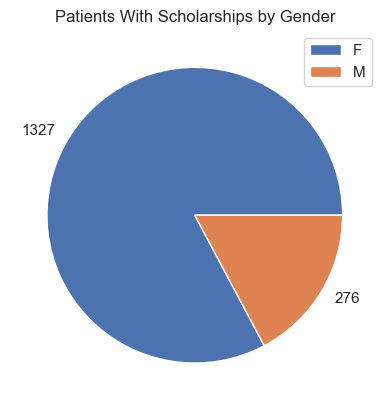

In [150]:
plt.pie(Number_Of_Genders_With_Scholarships, labels  = Number_Of_Genders_With_Scholarships)
plt.legend(Number_Of_Genders_With_Scholarships.index, loc = 'upper right')
plt.title('Patients With Scholarships by Gender')
plt.show()

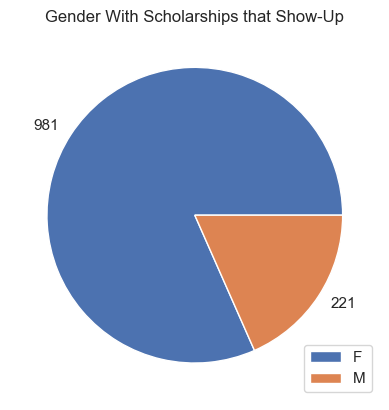

In [141]:
# From those that has scholarships, find how many males and females that show up

ShowUp_by_Gender = All_Those_With_Scholarship[All_Those_With_Scholarship['No-show'] =='No']['Gender'].value_counts()


plt.pie(ShowUp_by_Gender, labels  = ShowUp_by_Gender)
plt.legend(ShowUp_by_Gender.index, loc = 'lower right')
plt.title('Gender With Scholarships that Show-Up')
plt.show()

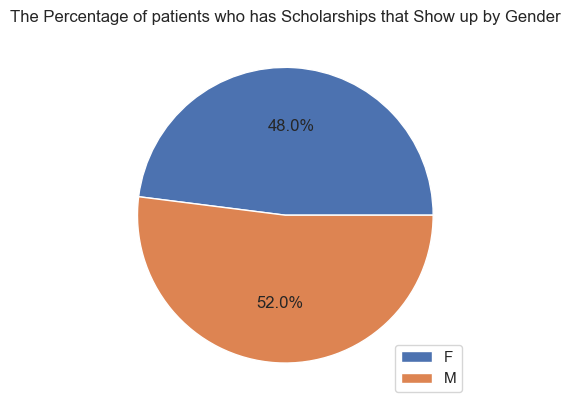

In [ ]:
# And finally, find the percentage of gender who has scholarships that show up

# To do this divide the ShowUp_by_Gender by Number_Of_Genders_With_Scholarships then multiply by 100

Percentage_of_showUps_by_Gender = (ShowUp_by_Gender/Number_Of_Genders_With_Scholarships)*100


plt.pie(Percentage_of_showUps_by_Gender,  autopct = '%1.1f%%')
plt.legend(Percentage_of_showUps_by_Gender.index, loc = 'lower right')
plt.title('The Percentage of patients who has Scholarships that Show up by Gender')
plt.show()